### Background
 Congratulations! You just got some contract work with an Ecommerce company based in Nwe York City that sells clothing online but they also have indoor style and clothing advice sessions. Customers come into the stores, have sessions?meetings with a personal stylist, they can go home and order wither on the mobile app or wbsite for the clothes they want.
 
 the company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Import the Required Library for the Project

In [5]:
import numpy as np #numerical processsind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get the data

We'll work with the customer csv file from the company, it has details of the customers such as 

- Avg session length: average session of the in store style advice
- Time on app : Average time spent on the App in minutes
- Time on website: Average timespent on the store website in minutes
- Length of membership: How many years the customer has been a member
- Yearly amount spent: Amount spent by the customers each year

Read in the csv file

In [7]:
customers = pd.read_csv('Ecommerce Customers.csv')
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


We'll drop the object columns, we'll not be needing them now

In [9]:
df = customers.drop(['Email', 'Address', 'Avatar'], axis=1)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### EDA
Let's look at our data, and ask a few questions

 1. Does the Yearly Amount Correlate with any of the other Variables

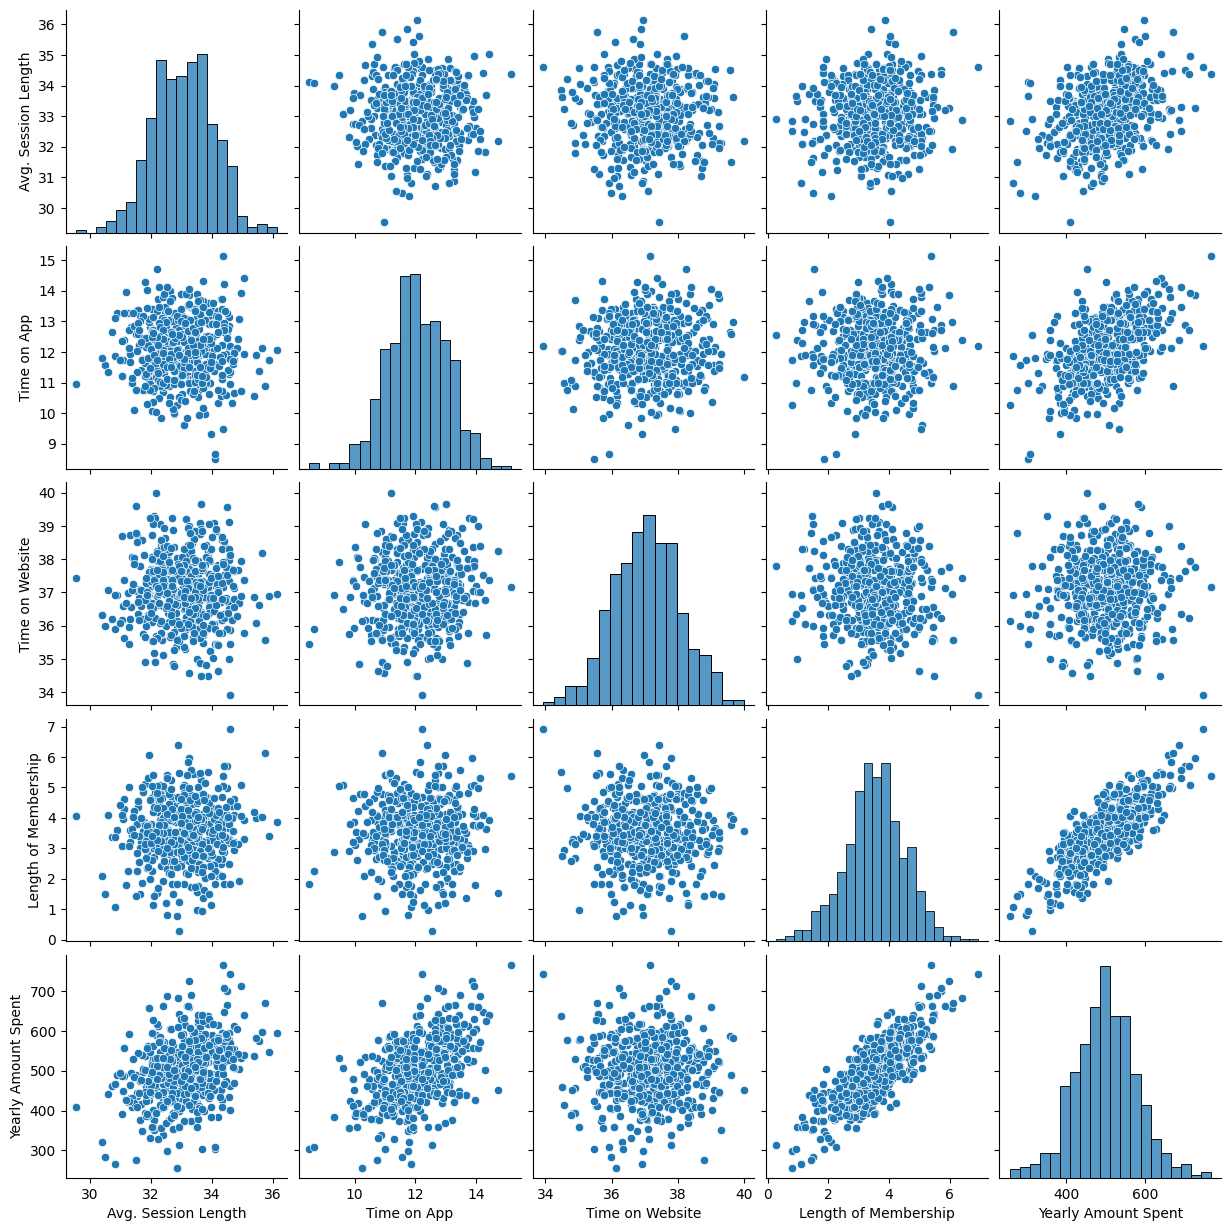

In [10]:
sns.pairplot(df);

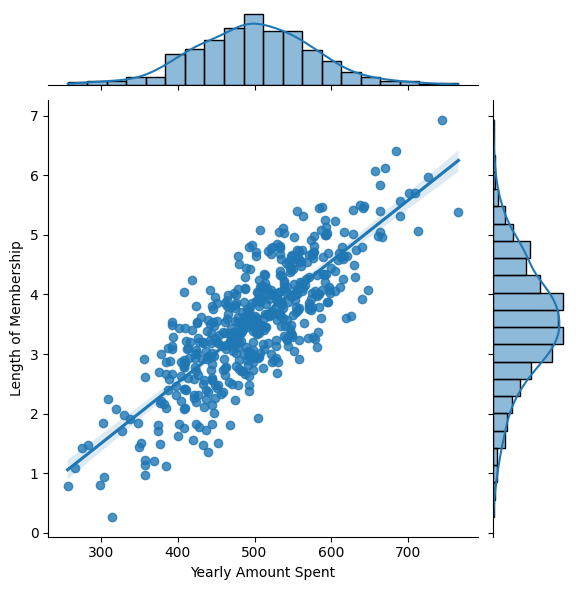

In [11]:
sns.jointplot(x ='Yearly Amount Spent', y = 'Length of Membership', data=df, kind='reg');

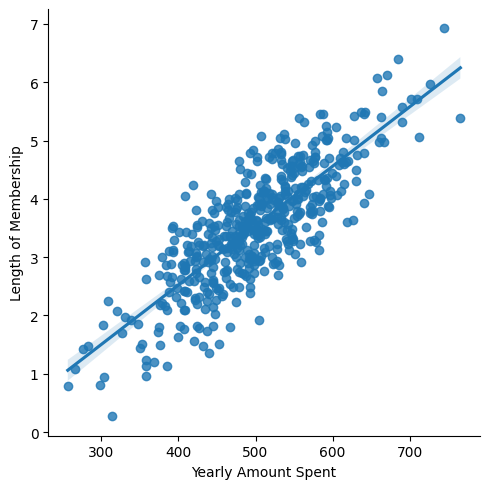

In [12]:
#create a linear model plot

sns.lmplot(x ='Yearly Amount Spent', y = 'Length of Membership', data=df);

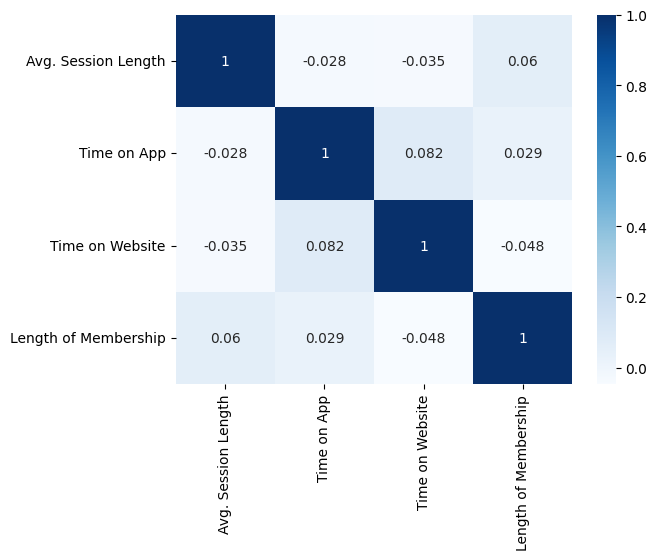

In [13]:
#check correlation

sns.heatmap(df.drop('Yearly Amount Spent', axis=1).corr(), annot=True, cmap='Blues');

Normally, you should spend more time on EDA but my objective here is to give you a walkthrough of building a linear regression model

### Training the Model and Testing Data

We need to split our data to training and testing sets

Also, we need to separate the features and the label

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [15]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [16]:
y = df['Yearly Amount Spent']

Sklearn has train test split method, we can specify our test size using this

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [20]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


### Training the Model

NB: we only train data on the train the model and test on your test data

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#create an instance of the linear regression model

model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [25]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [26]:
model.intercept_

-1047.932782250239

Youe Regression Equation is: 
yearly amount spent = 25.98Avg. session Length + 38.59015875Time on App + 0.19040528Time on Website + 61.27909654Length of Membership - -1047.932782250239

### Predicting on test Data
we want to evaluate the perfeomance of the model

In [27]:
prediction = model.predict(X_test)

In [28]:
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

lets compare our prediction with the y_test on a scatter plot

Text(0.5, 0, 'Actual Values')

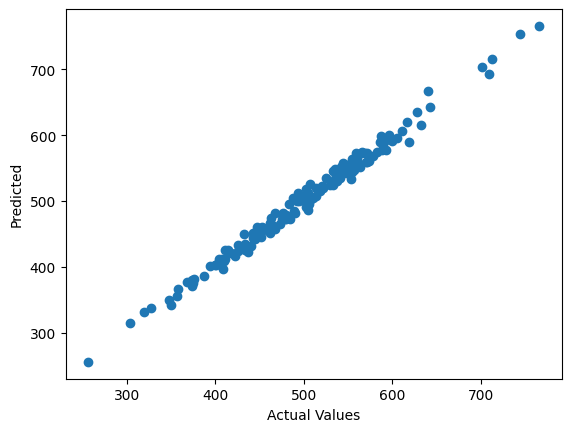

In [29]:
plt.scatter(y_test, prediction)
plt.ylabel('Predicted')
plt.xlabel('Actual Values')

In [30]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


In [31]:
X_test['Prediction']= prediction

In [32]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Prediction
18,32.187812,14.715388,38.244115,1.516576,456.441861
361,32.077590,10.347877,39.045156,3.434560,402.720053
104,31.389585,10.994224,38.074452,3.428860,409.253154
4,33.330673,12.795189,37.536653,4.446308,591.431034
156,32.294642,12.443048,37.327848,5.084861,590.014373
...,...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122,478.300766
346,32.765665,12.506548,35.823467,3.126509,484.410296
423,33.128693,10.398458,36.683393,3.859818,457.590999
17,32.338899,12.013195,38.385137,2.420806,411.526576


In [33]:
X_test['Actual amount spent']= y_test

In [34]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Prediction,Actual amount spent
18,32.187812,14.715388,38.244115,1.516576,456.441861,452.315675
361,32.077590,10.347877,39.045156,3.434560,402.720053,401.033135
104,31.389585,10.994224,38.074452,3.428860,409.253154,410.069611
4,33.330673,12.795189,37.536653,4.446308,591.431034,599.406092
156,32.294642,12.443048,37.327848,5.084861,590.014373,586.155870
...,...,...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122,478.300766,479.731938
346,32.765665,12.506548,35.823467,3.126509,484.410296,488.387526
423,33.128693,10.398458,36.683393,3.859818,457.590999,461.112248
17,32.338899,12.013195,38.385137,2.420806,411.526576,407.704548


In [35]:
X_test.to_csv('Prediction.csv')

### Mini exercise
1. What evaluation metrics do we use for linear regression model?
2. Briefly discuss these metrics within your group
3. Evaluate the model here using the metrics you identified
4. based on your evaluation, is this a good model? why? 
5. Explain breifly what the values you obtain for each metric mean in this  partiular case

### Question 1
-Mean Absolute Error (MAE)
-Mean Squared Error (MSE)
-R-squared (R²) Score
-Root Mean Squared Error (RMSE)

In [36]:
#using Mean Absolute Error
from sklearn.metrics import mean_absolute_error
 
true_values = [32.187812, 14.715388, 38.244115, 1.516576, 452.315675]
predicted_values = [32.187812, 14.715388, 38.244115, 1.516576, 456.441861]
 
mae = mean_absolute_error(true_values, predicted_values)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.8252372000000037


In [37]:
#using Mean Squared Error
from sklearn.metrics import mean_squared_error
 
true_values = [32.187812, 14.715388, 38.244115, 1.516576, 452.315675]
predicted_values = [32.187812, 14.715388, 38.244115, 1.516576, 456.441861]
 
mse = mean_squared_error(true_values, predicted_values)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.40508218131923


In [38]:
#using R-Squared Score
from sklearn.metrics import r2_score
 
true_values = [32.187812, 14.715388, 38.244115, 1.516576, 452.315675]
predicted_values = [32.187812, 14.715388, 38.244115, 1.516576, 456.441861]
 
r2 = r2_score(true_values, predicted_values)
print("R-squared (R²) Score:", r2)

R-squared (R²) Score: 0.9998858941622487


In [40]:
#Using Root Mean Squared Erroe
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
 
true_values = [32.187812, 14.715388, 38.244115, 1.516576, 452.315675]
predicted_values = [32.187812, 14.715388, 38.244115, 1.516576, 456.441861]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
 
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.8452864767615975
